## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Forecasting using ML

In [2]:
import numpy as np
import pandas as pd

from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)

### Forecasters in sktime

Check out our online estimator overview at: https://www.sktime.org/en/stable/estimator_overview.html

In [59]:
from sktime.registry import all_estimators

In [60]:
#all_estimators("forecaster", as_dataframe=True)

In [3]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

#### The Data 

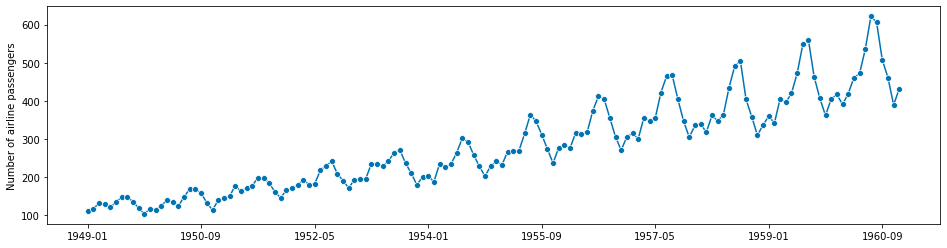

In [4]:
y = load_airline()
plot_series(y);

In [5]:
y_train, y_test = temporal_train_test_split(y, test_size=12)

fh = ForecastingHorizon(y_test.index, is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

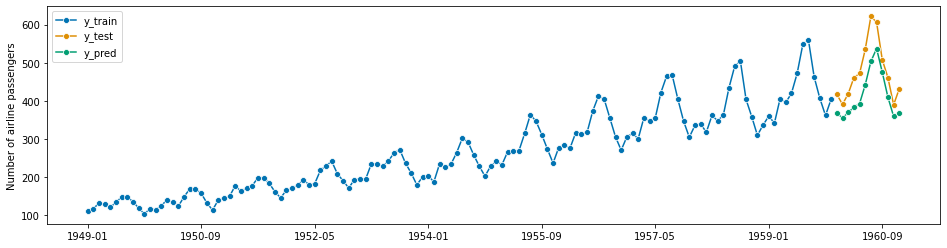

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=3)

#Convert the data to tabular form
forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)

y_pred = forecaster.predict()

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

#### Temporal cross-validation

In [7]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter, SlidingWindowSplitter
import utilities as ut

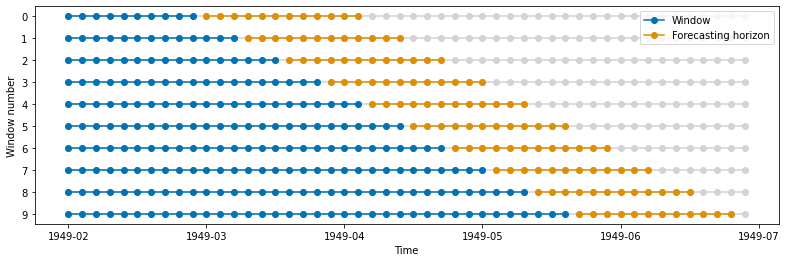

In [8]:
fh = ForecastingHorizon(np.arange(12) + 1)

cv = ExpandingWindowSplitter(step_length=3, fh=fh, initial_window=10)
ut.plot_windows(cv, y.iloc[:50])

#### Backtesting: Evaluation using temporal cross-validaton

In [16]:
cv = ExpandingWindowSplitter(step_length=12, fh=fh, initial_window=72)

results = evaluate(forecaster=forecaster, y=y, cv=cv, 
                   strategy="refit", return_data=True)
results.iloc[:, :5].head()

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.156801,0.002874,0.006334,72,1954-12
1,0.117312,0.003421,0.005825,84,1955-12
2,0.100374,0.002865,0.007693,96,1956-12
3,0.050407,0.003804,0.006563,108,1957-12
4,0.101276,0.006129,0.009195,120,1958-12


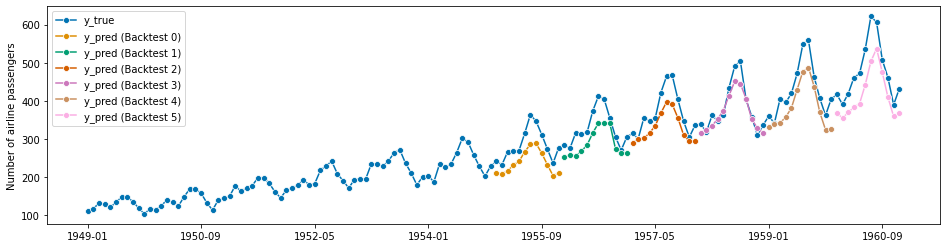

In [17]:
fig, ax = plot_series(
    y,
    results["y_pred"].iloc[0],
    results["y_pred"].iloc[1],
    results["y_pred"].iloc[2],
    results["y_pred"].iloc[3],
    results["y_pred"].iloc[4],
    results["y_pred"].iloc[5],
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(6)],
)
ax.legend();

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

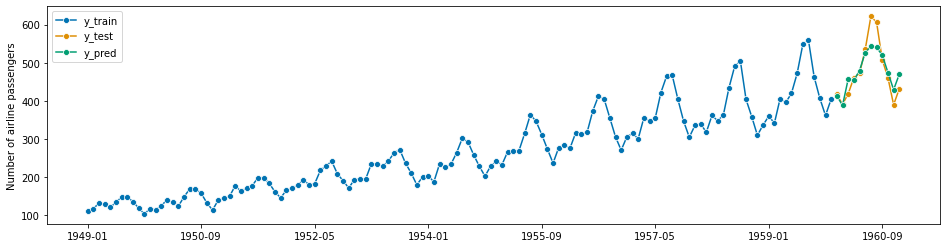

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction

y_train, y_test = temporal_train_test_split(y, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)

regressor = RandomForestRegressor(n_estimators=50)

forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)

y_pred = forecaster.predict()

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [19]:
fh = ForecastingHorizon(np.arange(12) + 1)
cv = ExpandingWindowSplitter(step_length=12, fh=fh, initial_window=72)

results = evaluate(forecaster=forecaster, y=y, cv=cv, 
                   strategy="refit", return_data=True)
results.iloc[:, :5].head()

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.119177,0.040853,0.043639,72,1954-12
1,0.057462,0.059286,0.049391,84,1955-12
2,0.079239,0.060244,0.047812,96,1956-12
3,0.130390,0.056089,0.050313,108,1957-12
4,0.067194,0.060868,0.046681,120,1958-12


***